Name : Dilshan J.V.A.P

Index number : 190144D

Exercise 6

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

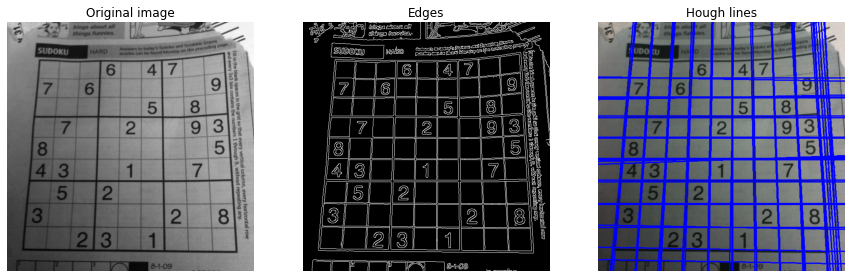

In [3]:
#Q1
im =cv.imread(r'sudoku.png',cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,20,120,apertureSize=3)
lines = cv.HoughLines(edges,1 ,np.pi/180,175)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0 +1000*(-b)),int(y0 +1000*(a))
    x2,y2 = int(x0 -1000*(-b)),int(y0 -1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(gray, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original image")
ax[1].imshow(edges, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Edges")
ax[2].imshow(im)
ax[2].axis('off')
ax[2].set_title("Hough lines")
plt.show()

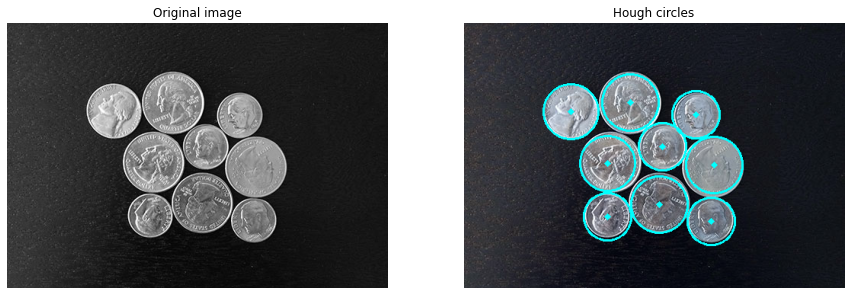

In [5]:
#Q2
im = cv.imread(r'coins.jpg',cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1=150, param2=20, minRadius=30, maxRadius=38)
circles = np.uint16(np.round(circles))
for i in circles[0, :]:
    cv.circle(im, (i[0], i[1]), i[2], (0, 255, 255), 2)
    cv.circle(im, (i[0], i[1]), 2, (0, 255, 255), 3)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(gray, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original image")
ax[1].imshow(im)
ax[1].axis('off')
ax[1].set_title("Hough circles")
plt.show()

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


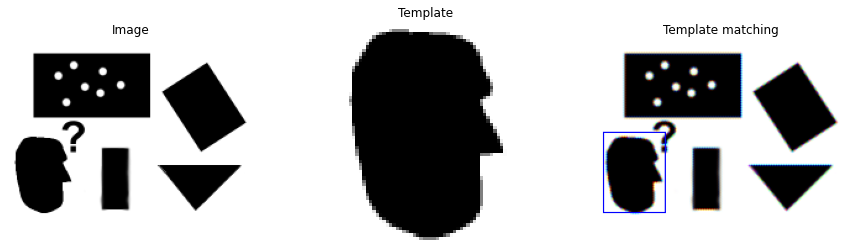

In [8]:
#Q3
imgl = cv.imread(r'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert imgl is not None

templ = cv.imread(r'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(imgl, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)

positions, votes = alg.detect(im_edges)
out = cv.cvtColor(imgl, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1]/ 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x, y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0, 0, 255))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].imshow(imgl, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Image")
ax[1].imshow(templ, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Template")
ax[2].imshow(out)
ax[2].axis('off')
ax[2].set_title("Template matching")
plt.show()

<b>Alignment</b>

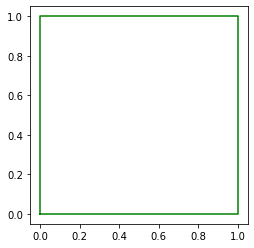

In [3]:
#Q4
a,b,c,d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T
theta = np.pi*30/180
s=1
tx,ty = 2,3
H = np.array([[s*np.cos(theta), -s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
Y= H @ X
x= np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])
fig,ax = plt.subplots(1,1)
ax.plot(x,y,color = 'g')
ax.set_aspect('equal')
plt.show()


<bound method _AxesBase.set_aspect of <AxesSubplot:>>

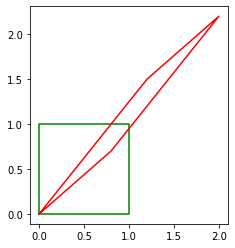

In [6]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T
theta = np.pi*30/180
s = 1
tx, ty = 0,0

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X
x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')
x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect

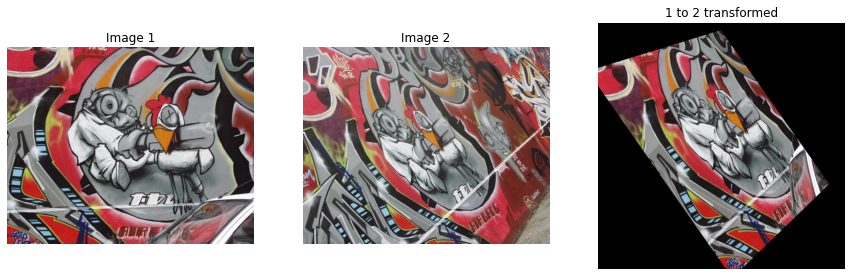

In [7]:
#Q5
im1 = cv.imread(r'img1.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
im4 = cv.imread(r'img4.ppm', cv.IMREAD_ANYCOLOR)
assert im4 is not None
H = np.array(((6.6378505e-01, 6.8003334e-01, -3.1230335e+01),(-1.4495500e-01, 9.7128304e-01, 1.4877420e+02),(4.2518504e-04, -1.3930359e-05, 1.0000000e+00)))
im1to4 = cv.warpPerspective(im1, H, (750, 750))

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(im4,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Image 2")
ax[2].imshow(cv.cvtColor(im1to4,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].set_title("1 to 2 transformed")
plt.show()